# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [ ]:
con = sqlite3.connect('/content/reddit_data1.db')
df = pd.read_sql_query('SELECT * from reddit_data1;', con)
con.close()
df

,title,text,score,id,created_utc,n_comments,link
0,Transaction collector that stores bank transac...,Howdy! Not a Python Dev so my code is not the ...,0,1g64qxz,1.729208e+09,0,/r/Python/comments/1g64qxz/transaction_collect...
1,I built an open-source AI-driven Code Review a...,**What My Project Does**\n\nI recently built a...,0,1g63rs4,1.729206e+09,0,/r/Python/comments/1g63rs4/i_built_an_opensour...
2,Anyone developed python SDK that works with de...,Has anyone developed a python SDK that uses de...,0,1g63nhl,1.729205e+09,2,/r/Python/comments/1g63nhl/anyone_developed_py...
3,"Advanced python tips, libraries or best practi...",I have been working as a software engineer for...,40,1g5xswk,1.729190e+09,23,/r/Python/comments/1g5xswk/advanced_python_tip...
4,[Project] Automatically detecting optimal cuda...,"For folks who are doing ML, I often face the c...",3,1g5wv6n,1.729187e+09,0,/r/Python/comments/1g5wv6n/project_automatical...
...,...,...,...,...,...,...,...
943,PyPI Scout - Searching for Python packages on...,# What My Project Does\n\nFinding the right Py...,1,1dhylia,1.718632e+09,1,/r/Python/comments/1dhylia/pypi_scout_searchin...
944,Advice for creating 3D modelling program,I am creating a Python program which models 3D...,5,1dhudt2,1.718618e+09,11,/r/Python/comments/1dhudt2/advice_for_creating...
945,NumPy 2.0.0 is the first major release since 2...,NumPy 2.0.0 is the first major release since 2...,586,1dhtifv,1.718614e+09,60,/r/Python/comments/1dhtifv/numpy_200_is_the_fi...
946,Monday Daily Thread: Project ideas!,# Weekly Thread: Project Ideas 💡\n\nWelcome to...,5,1dhkxbq,1.718582e+09,0,/r/Python/comments/1dhkxbq/monday_daily_thread...


# you can use the keyword method, Python packages, or other methods to extract the sentiment scores

In [ ]:
sentiment_df = pd.read_csv('/content/AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [ ]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [ ]:
sentiment_dict = sentiment_df.to_dict()['score']

In [ ]:
sentiment_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [ ]:
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)


    title_sentiments.append(np.mean(this_titles_sentiments))

In [ ]:
df['keyword_sentiment'] = title_sentiments

# plot a histogram of the sentiment scores

Text(0, 0.5, 'Frequency')

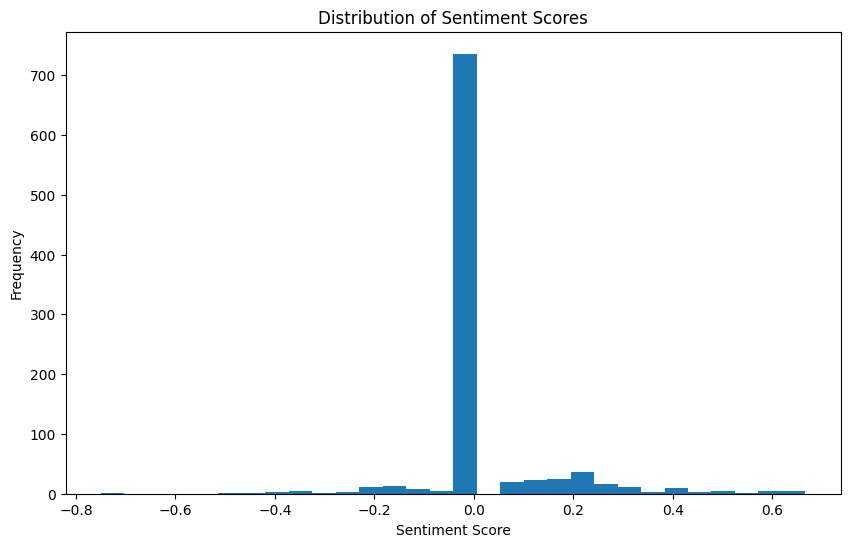

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df['keyword_sentiment'].plot.hist(bins=30)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

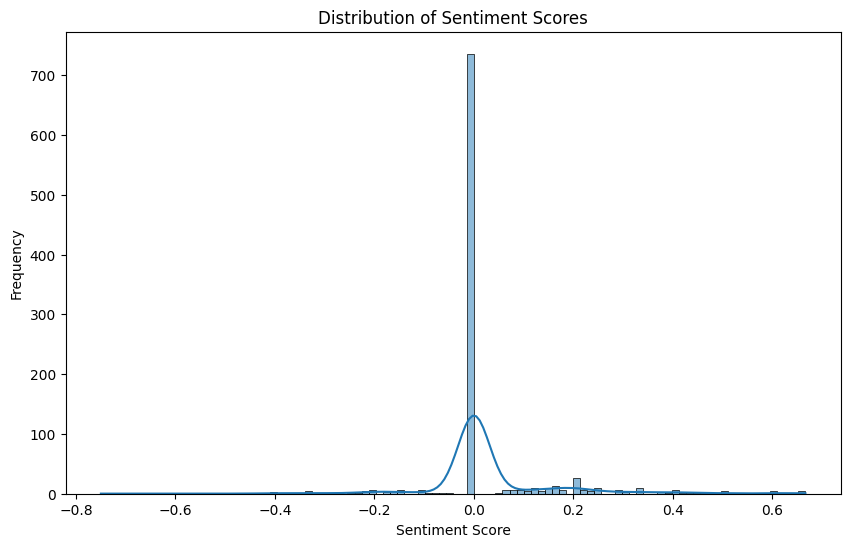

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['keyword_sentiment'], bins=100,kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

In [ ]:
df['keyword_sentiment'].mean()

0.028355032812110444

# look at descriptive statistics (mean, median, standard deviation) of the sentiment scores

In [ ]:
mean_score = np.mean(df['keyword_sentiment'])
median_score = np.median(df['keyword_sentiment'])
std_dev = np.std(df['keyword_sentiment'])
print(f"The Mean sentiment score is: {mean_score}, The Median sentiment score is: {median_score}, The Std Dev is: {std_dev}")

The Mean sentiment score is: 0.028355032812110444, The Median sentiment score is: 0.0, The Std Dev is: 0.1254332914426755


# examine the text for some of the highest and lowest sentiment scores

In [ ]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
166,Rant of the Day,-0.750000
610,The trouble with __all__,-0.500000
446,A Dead Simple Work Queue Using SQLite,-0.428571
533,"cachemethod, python's missing cache functionality",-0.400000
555,The Shameful Defenestration of Tim,-0.400000
...,...,...
252,Best Practices for JSON Conversion,0.600000
111,I wanna create something fun and useful in Python,0.666667
921,Video Quality Ranker,0.666667
664,Funny Value error,0.666667


In [ ]:
# full titles of the bottom 10 sentiments
df.sort_values(by='keyword_sentiment')[['title','keyword_sentiment']][:10]

,title,keyword_sentiment
166,Rant of the Day,-0.750000
610,The trouble with __all__,-0.500000
446,A Dead Simple Work Queue Using SQLite,-0.428571
533,"cachemethod, python's missing cache functionality",-0.400000
555,The Shameful Defenestration of Tim,-0.400000
168,Ban Transparency from Tim Peters,-0.400000
187,WTF is ASGI and WSGI in python apps? - A writeup,-0.363636
282,Formatron: a high-performance constrained deco...,-0.333333
214,"MAD (Machine Learning, AI, Data) Map for real-...",-0.333333
858,Lack of TreeMap equivalent in Python,-0.333333


In [ ]:

df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Video Quality Ranker',
 'Funny Value error',
 'So much funny when coding datetime',
 'I wanna create something fun and useful in Python',
 'Best Practices for JSON Conversion',
 "Python 3.13's best new features",
 'I love the Python community',
 "Stake's Popular Plinko with Python",
 'PerpetualBooster: improved multi-threading and quantile regression support',
 'Sharing what I would consider as a win']

In [ ]:

df.sort_values(by='keyword_sentiment',ascending=False)[['title','keyword_sentiment']][:10]

,title,keyword_sentiment
921,Video Quality Ranker,0.666667
664,Funny Value error,0.666667
721,So much funny when coding datetime,0.666667
111,I wanna create something fun and useful in Python,0.666667
252,Best Practices for JSON Conversion,0.600000
100,Python 3.13's best new features,0.600000
435,I love the Python community,0.600000
125,Stake's Popular Plinko with Python,0.600000
241,PerpetualBooster: improved multi-threading and...,0.571429
557,Sharing what I would consider as a win,0.500000


# Summary

Write a short summary of what you did and the results here.

Here i have connected to the sqlite database and loaded the data from the database.The reddit data is used for predicting the sentiment on the choosen sub reddit.Here we have the sentiment scores from the AFFIN Lexcicon.We will use this to find the sentiment for the titles.We will split the sentence into words and will replace the sentiment value from the AFFIN Lexcicon data and if the word doesnt exsist then the value is considered as zero.Then we will find the mean for whole sentence and it is considered as the sentiment score for the sentence.The histogram of the sentiment scores is skewed towards right indicating the positive sentiment .The peak at zero indicates the majority of posts have neutral sentiment.The Mean sentiment score is: 0.028355032812110444 which indicates that ovaerall sentiment in the dataset is little positive , The Median sentiment score is: 0.0 and we can see in the histogram it is peaked around the zero, The Std Dev is: 0.1254332914426755.The top negative sentiment is for Rant of the Day and its  score is	-0.750000.The top positive sentiment is for Video Quality Ranker and the sentiment is	0.666667

We can use this sentiment analysis for predicting the stock market.We can have the sub topics which can effect the stockmarket and we can find the sentiment analysis from them.Based on this we can take a decison whether to  trade or not to trade.THis can also help comapnies to find the results of the products they launched ans what people think about them and can impove them further

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
def compare_sentiment(text):
    blob = TextBlob(text)
    vader = SentimentIntensityAnalyzer()

    textblob_polarity = blob.sentiment.polarity
    vader_compound = vader.polarity_scores(text)['compound']

    return textblob_polarity, vader_compound

In [ ]:
sample_texts = [
    "The food was great!",
    "This movie is terrible.",
    "I'm feeling okay about this.",
    "AMAZING product! Absolutely love it!!!",
    "This is so bad :("
]

for text in sample_texts:
    tb_score, vader_score = compare_sentiment(text)
    print(f"Text: {text}")
    print(f"TextBlob: {tb_score:.2f}, VADER: {vader_score:.2f}\n")

Text: The food was great!
TextBlob: 1.00, VADER: 0.66

Text: This movie is terrible.
TextBlob: -1.00, VADER: -0.48

Text: I'm feeling okay about this.
TextBlob: 0.50, VADER: 0.34

Text: AMAZING product! Absolutely love it!!!
TextBlob: 0.86, VADER: 0.90

Text: This is so bad :(
TextBlob: -0.72, VADER: -0.83



In [ ]:
df[['blob', 'vader']] = df['title'].apply(lambda x: pd.Series(compare_sentiment(x)))

In [ ]:
df.head()

,title,text,score,id,created_utc,n_comments,link,keyword_sentiment,blob,vader
0,Transaction collector that stores bank transac...,Howdy! Not a Python Dev so my code is not the ...,0,1g64qxz,1.729208e+09,0,/r/Python/comments/1g64qxz/transaction_collect...,0.000000,0.0,0.0000
1,I built an open-source AI-driven Code Review a...,**What My Project Does**\n\nI recently built a...,0,1g63rs4,1.729206e+09,0,/r/Python/comments/1g63rs4/i_built_an_opensour...,0.000000,0.0,0.0000
2,Anyone developed python SDK that works with de...,Has anyone developed a python SDK that uses de...,0,1g63nhl,1.729205e+09,2,/r/Python/comments/1g63nhl/anyone_developed_py...,0.000000,0.1,0.0000
3,"Advanced python tips, libraries or best practi...",I have been working as a software engineer for...,40,1g5xswk,1.729190e+09,23,/r/Python/comments/1g5xswk/advanced_python_tip...,0.444444,0.7,0.7351
4,[Project] Automatically detecting optimal cuda...,"For folks who are doing ML, I often face the c...",3,1g5wv6n,1.729187e+09,0,/r/Python/comments/1g5wv6n/project_automatical...,0.000000,0.0,0.3612


In [ ]:
correlation = df['blob'].corr(df['vader'])

In [ ]:
correlation

0.5306717290131143

Text(0.5, 1.0, 'TextBlob vs VADER Sentiment Scores')

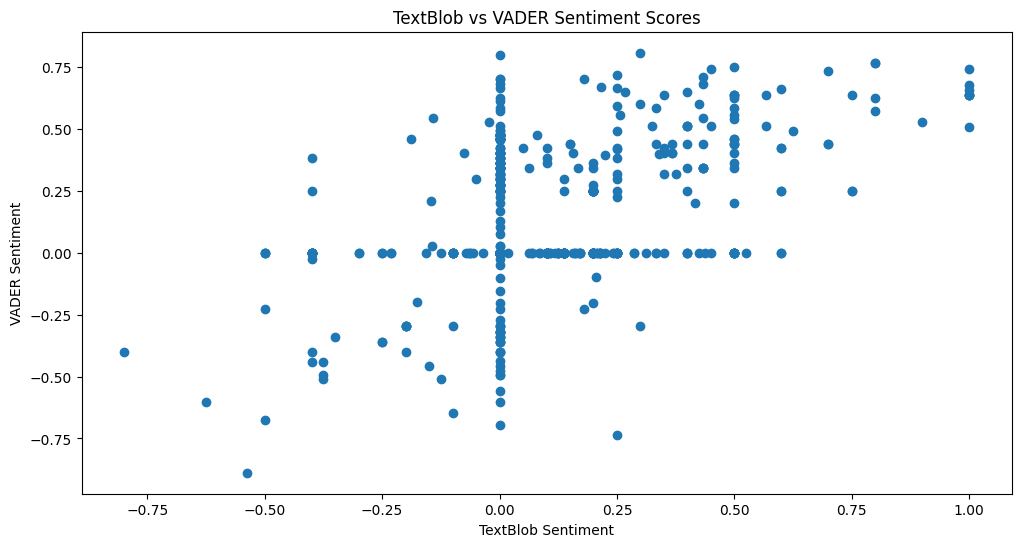

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['blob'], df['vader'])
plt.xlabel('TextBlob Sentiment')
plt.ylabel('VADER Sentiment')
plt.title('TextBlob vs VADER Sentiment Scores')


Text(0.5, 1.0, 'TextBlob vs VADER Sentiment Scores')

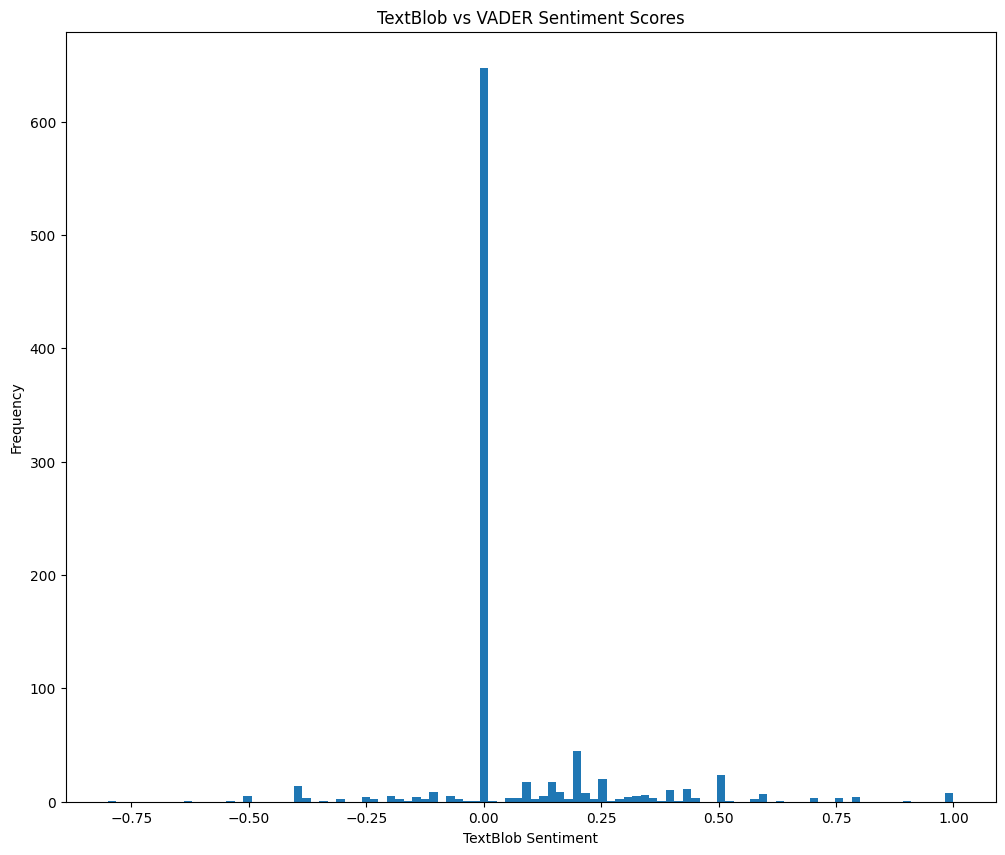

In [ ]:
plt.figure(figsize=(12, 10))
df['blob'].plot.hist(bins=100)
plt.xlabel('TextBlob Sentiment')
plt.ylabel('Frequency')
plt.title('TextBlob vs VADER Sentiment Scores')


Text(0.5, 1.0, 'VADER Sentiment Score')

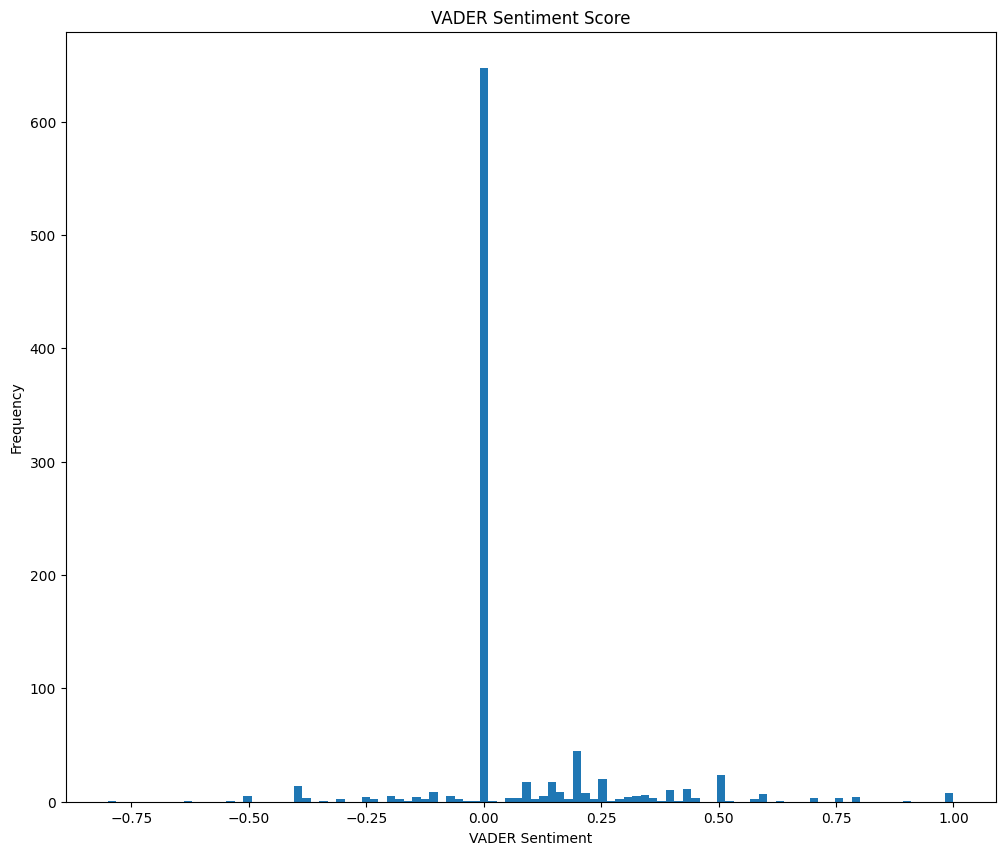

In [ ]:
plt.figure(figsize=(12, 10))
df['blob'].plot.hist(bins=100)
plt.xlabel('VADER Sentiment')
plt.ylabel('Frequency')
plt.title('VADER Sentiment Score')


In [ ]:
df['subjectivity']=df['title'].apply(lambda x :TextBlob(x).sentiment.subjectivity)

In [ ]:
df.head()

,title,text,score,id,created_utc,n_comments,link,keyword_sentiment,subjectivity,blob,vader
0,Transaction collector that stores bank transac...,Howdy! Not a Python Dev so my code is not the ...,0,1g64qxz,1.729208e+09,0,/r/Python/comments/1g64qxz/transaction_collect...,0.000000,0.00,0.0,0.0000
1,I built an open-source AI-driven Code Review a...,**What My Project Does**\n\nI recently built a...,0,1g63rs4,1.729206e+09,0,/r/Python/comments/1g63rs4/i_built_an_opensour...,0.000000,0.00,0.0,0.0000
2,Anyone developed python SDK that works with de...,Has anyone developed a python SDK that uses de...,0,1g63nhl,1.729205e+09,2,/r/Python/comments/1g63nhl/anyone_developed_py...,0.000000,0.30,0.1,0.0000
3,"Advanced python tips, libraries or best practi...",I have been working as a software engineer for...,40,1g5xswk,1.729190e+09,23,/r/Python/comments/1g5xswk/advanced_python_tip...,0.444444,0.45,0.7,0.7351
4,[Project] Automatically detecting optimal cuda...,"For folks who are doing ML, I often face the c...",3,1g5wv6n,1.729187e+09,0,/r/Python/comments/1g5wv6n/project_automatical...,0.000000,0.00,0.0,0.3612


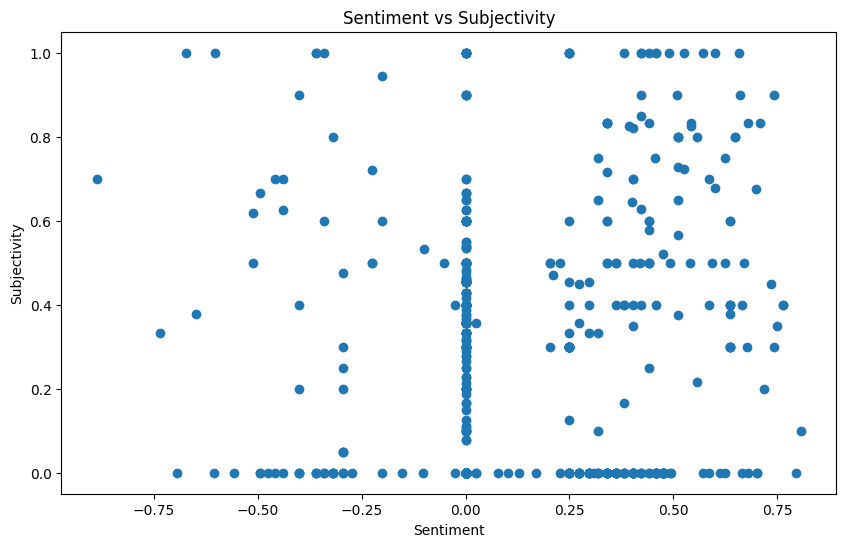

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['vader'], df['subjectivity'])
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')
plt.title('Sentiment vs Subjectivity')
plt.show()

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from gensim import corpora
from gensim.models import LdaModel
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def preprocess(text):
    return [word.lower() for word in word_tokenize(text) if word.lower() not in STOPWORDS]

In [ ]:
from collections import Counter

def get_frequent_words(texts, sentiment_scores, sentiment_threshold):
    words = []
    for text, score in zip(texts, sentiment_scores):
        if score >= sentiment_threshold:
            words.extend(preprocess(text))
    return Counter(words).most_common(10)

positive_words = get_frequent_words(df['title'], df['vader'], 0.5)
negative_words = get_frequent_words(df['title'], df['vader'], -0.5)

print("Most frequent words in positive posts:")
print(positive_words)
print("\nMost frequent words in negative posts:")
print(negative_words)

Most frequent words in positive posts:
[('python', 24), (':', 18), ('?', 15), ('best', 12), (',', 11), ('free', 9), ('!', 8), ('.', 7), (')', 6), ('libraries', 5)]

Most frequent words in negative posts:
[('python', 335), (':', 303), (',', 167), ('daily', 140), ('thread', 140), ('?', 113), ('!', 109), ('-', 92), (')', 64), ('.', 64)]
